In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

**Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**PCA Dimensionality reduction is applied to the credit card informations
to protect user identities and sensitive features(v1-v28)**

### Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

In [3]:
main_df = pd.read_csv('creditcard.csv')
main_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [69]:
main_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
classes =main_df.groupby('Class').size() 
classes

Class
0    284315
1       492
dtype: int64

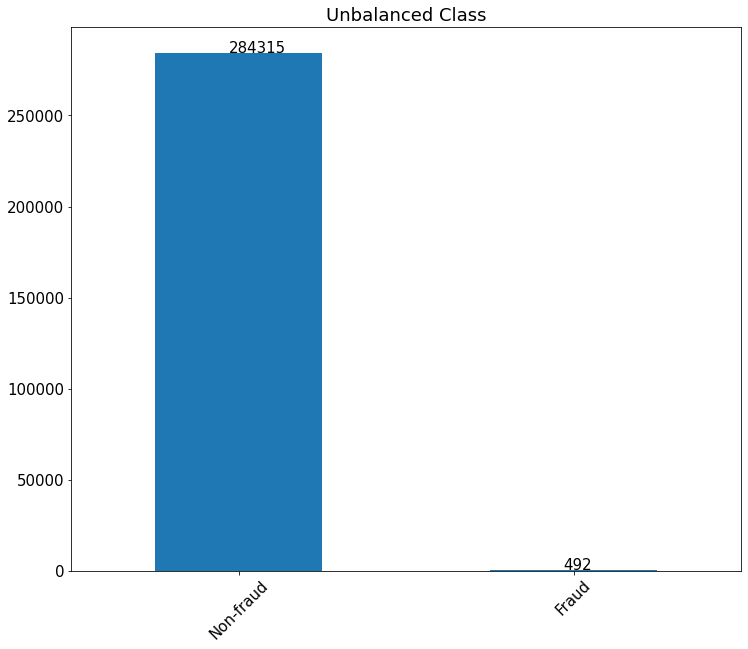

In [73]:
plt.figure(figsize=(12,10))

ax=main_df.groupby('Class').size().plot(kind = 'bar')
plt.title('Unbalanced Class')
x_offset = -0.03
y_offset = 50
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.xticks([0,1],['Non-fraud','Fraud'],rotation=45)
plt.xlabel('')
plt.rcParams.update({'font.size': 15})
plt.show()

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [5]:
pca_features = main_df.loc[:,'V1':'V28']
pca_features.var()

V1     3.836489
V2     2.726820
V3     2.299029
V4     2.004684
V5     1.905081
V6     1.774946
V7     1.530401
V8     1.426479
V9     1.206992
V10    1.185594
V11    1.041855
V12    0.998403
V13    0.990571
V14    0.918906
V15    0.837803
V16    0.767819
V17    0.721373
V18    0.702539
V19    0.662662
V20    0.594325
V21    0.539526
V22    0.526643
V23    0.389951
V24    0.366808
V25    0.271731
V26    0.232543
V27    0.162919
V28    0.108955
dtype: float64

In [6]:
var = pca_features.var()
var.index

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

<AxesSubplot:>

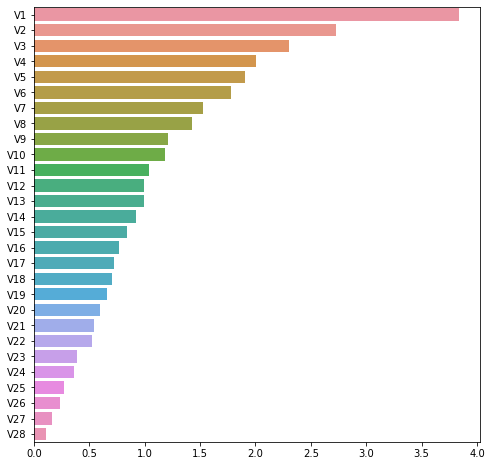

In [7]:
plt.figure(figsize=(8,8))
sns.barplot(y=var.index, x= var.values, orient =  "h")

In [8]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    
    Return a list or array containing the cumulative explained variance 
    '''
    sum_eig_vals = np.sum(eig_vals)
    
    var_exp = (eig_vals/sum_eig_vals)*100
    
    cum_var_exp = np.cumsum(var_exp)
    
    return cum_var_exp
cum_var =calculate_cum_var_exp(pca_features.var())

In [9]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)
    

    plt.show()

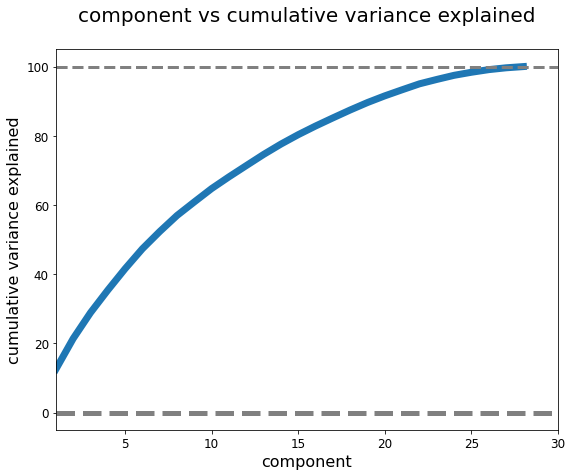

In [10]:
plot_var_exp(pca_features.var())

## All the PCA components contents contain important informations, hence they are already reduced features from the original set

In [7]:
main_df['Time_hr'] = main_df['Time']/(60*60)

In [8]:
main_df['Time_hr'].describe()

count    284807.000000
mean         26.337183
std          13.191152
min           0.000000
25%          15.055972
50%          23.525556
75%          38.700139
max          47.997778
Name: Time_hr, dtype: float64

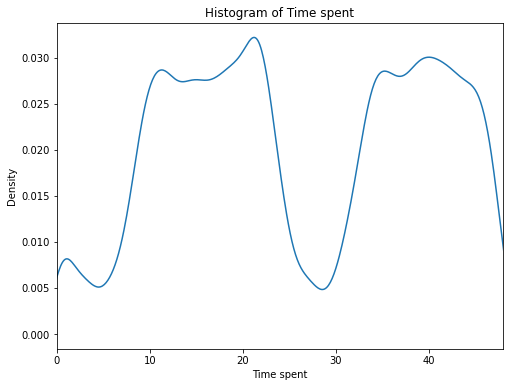

Wall time: 6.2 s


In [9]:
%%time
plt.figure(figsize = (8,6))
ax=main_df['Time_hr'].plot(kind = 'kde')
plt.xlabel('Time spent')
plt.title('Histogram of Time spent')
ax.set_xlim([0,main_df['Time_hr'].max()])
plt.show()

In [10]:
non_fraud = main_df[main_df['Class']== 0]
fraud = main_df[main_df['Class']==1]

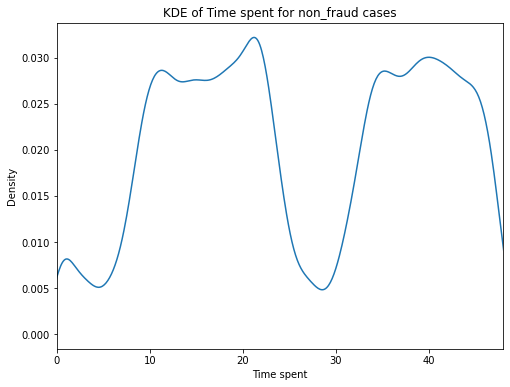

In [13]:
plt.figure(figsize = (8,6))
ax=non_fraud['Time_hr'].plot(kind = 'kde')
ax.set_xlim([0,non_fraud['Time_hr'].max()])
plt.xlabel('Time spent')
plt.title('KDE of Time spent for non_fraud cases')

plt.show()

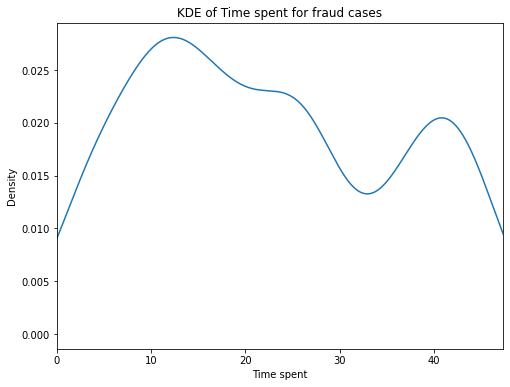

In [12]:
plt.figure(figsize = (8,6))
ax=fraud['Time_hr'].plot(kind = 'kde')
plt.xlabel('Time spent')
plt.title('KDE of Time spent for fraud cases')
ax.set_xlim([0,fraud['Time_hr'].max()])
plt.show()

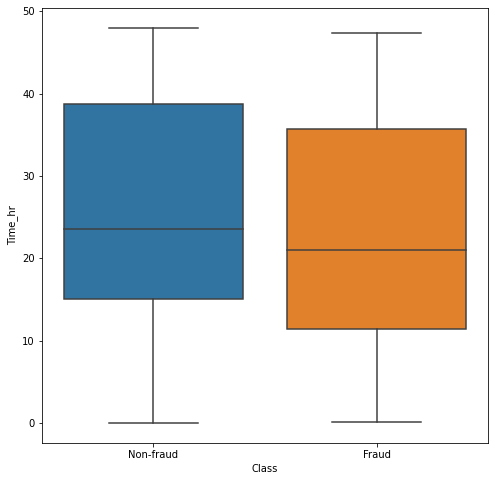

In [104]:
plt.figure(figsize =(8,8))
sns.boxplot(x='Class', y='Time_hr' , data = main_df)
plt.xticks([0,1],['Non-fraud','Fraud'])

plt.show()

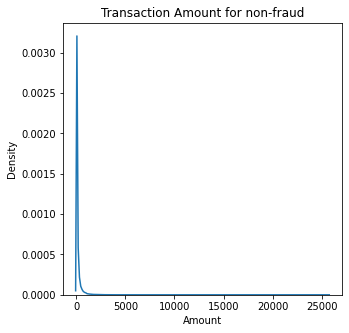

In [94]:
plt.figure(figsize =(5,5))
sns.kdeplot(non_fraud['Amount'])
plt.title('Transaction Amount for non-fraud')
plt.rcParams.update({'font.size': 5})
plt.show()

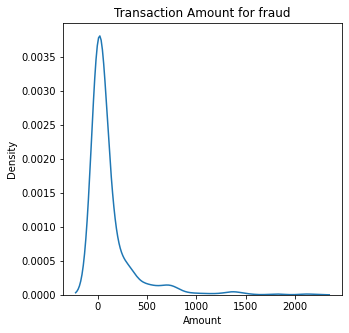

In [100]:
plt.figure(figsize =(5,5))
sns.kdeplot(fraud['Amount'])
plt.title('Transaction Amount for fraud')
plt.rcParams.update({'font.size': 10})
plt.show()

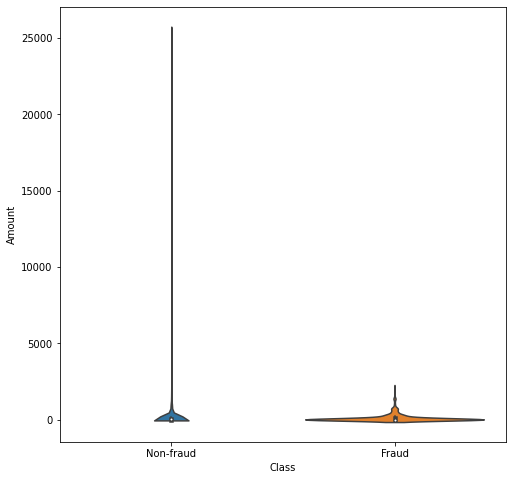

In [103]:
plt.figure(figsize =(8,8))
sns.violinplot(x='Class', y='Amount' , data = main_df)
plt.xticks([0,1],['Non-fraud','Fraud'])
plt.show()

# Machine Learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


In [4]:
#scaling non_pca features
def scale_features(X_train,X_test):
    
    #input X_train,X_test must be pandas dataframe
    
    X_train_pca = X_train.drop(columns=['Time','Amount'])
    X_train_non_pca = X_train[['Time','Amount']]

    X_test_pca = X_test.drop(columns=['Time','Amount'])
    X_test_non_pca = X_test[['Time','Amount']]

    scaler = StandardScaler()
    scaler.fit(X_train_non_pca)
    X_train_non_pca = scaler.transform(X_train_non_pca)
    X_test_non_pca = scaler.transform(X_test_non_pca)
    
    #the order of features is now V1: V28, then Time and Amount!

    X_train_scaled = np.concatenate((np.array(X_train_pca),X_train_non_pca), axis=1)
    X_test_scaled = np.concatenate((np.array(X_test_pca),X_test_non_pca), axis=1) 
    
    pca_heading = ['V'+str(x) for x in range(1,29)]
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = pca_heading+['Time','Amount'])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = pca_heading+['Time','Amount'])
    
    return X_train_scaled, X_test_scaled


In [5]:
#helper function for training models
def train_model(index,X_train, X_test, y_train, y_test,model):



    
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    print('Score for training',train_score)
    test_score = model.score(X_test,y_test)
    print('Score for testing',test_score)

    print(classification_report(y_test, model.predict(X_test)))

    con_matrix=confusion_matrix(y_test, model.predict(X_test))
    TP = con_matrix[1,1]
    TN = con_matrix[0,0]
    FP = con_matrix[0,1]
    FN = con_matrix[1,0]

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    index_num = index_summary.index(index) 
    
    list_train_score[index_num]= train_score
    list_test_score[index_num] = test_score
    list_precision[index_num] = precision
    list_recall[index_num] = recall
    
    return model


In [6]:
index_summary = [(str(num)+part) for num in range(1,5) for part in 'abcd' ]
print(index_summary)

list_train_score = np.empty(len(index_summary))
list_test_score = np.empty(len(index_summary))
list_precision = np.empty(len(index_summary))
list_recall = np.empty(len(index_summary))



['1a', '1b', '1c', '1d', '2a', '2b', '2c', '2d', '3a', '3b', '3c', '3d', '4a', '4b', '4c', '4d']


In [7]:
model_used = ['Logistic_Regression','Naive_Bayes','Support_Vector_Machine','Decision_tree']*4
sampling_method = ['Original']*4 + ['Upsampling']*4 + ['Downsampling']*4 +['SMOTE']*4


In [16]:
def check_summary():
    pd.set_option('display.float_format', lambda x: '%.5f' % x)
    result_summary = pd.DataFrame({'Sampling_method':sampling_method, 'Classification_model':model_used, 
                                   'Training_score':list_train_score, 'Testing_score': list_test_score, 'Precision':list_precision,
                                   'Recall':list_recall},index=index_summary)
    return result_summary



check_summary()

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall
1a,Original,Logistic_Regression,0.00000,0.00000,0.00000,0.00000
1b,Original,Naive_Bayes,0.00000,0.00000,0.00000,0.00000
1c,Original,Support_Vector_Machine,0.00000,0.00000,0.00000,0.00000
1d,Original,Decision_tree,0.00000,0.00000,0.00000,0.00000
2a,Upsampling,Logistic_Regression,0.00000,0.00000,0.00000,0.00000
2b,Upsampling,Naive_Bayes,0.00000,0.00000,0.00000,0.00000
2c,Upsampling,Support_Vector_Machine,0.00000,0.00000,0.00000,0.00000
2d,Upsampling,Decision_tree,0.00000,0.00000,0.00000,0.00000
3a,Downsampling,Logistic_Regression,0.00000,0.00000,0.00000,0.00000
3b,Downsampling,Naive_Bayes,0.00000,0.00000,0.00000,0.00000


### Trial 1: Using original samples

In [109]:
X = main_df.loc[:,'Time':'Amount']
y = main_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =123)


In [110]:
X_train, X_test =scale_features(X_train,X_test)

In [117]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
0,-0.866221,-0.919624,2.020857,-1.525794,-1.035785,2.157966,-0.281997,0.608243,-0.595195,-0.192038,...,0.511087,1.154578,-0.070794,-1.678518,0.511949,0.159084,0.044666,0.063497,-0.584780,0.556248
1,0.967267,-0.179598,0.315800,1.354288,-0.273647,0.139429,-0.005874,0.174708,0.195502,0.040867,...,-0.015079,-0.078930,-0.131669,-0.001284,0.565061,-0.334174,0.013635,0.017108,-0.870146,-0.002494
2,-0.415673,1.080659,0.675844,0.789318,0.158613,0.430765,0.135873,0.671417,-1.000854,-0.298512,...,0.287891,0.782205,0.004812,-0.271442,-0.301717,-0.287004,-0.015223,-0.034233,-0.855394,-0.287905
3,2.036473,-0.021870,-1.085398,0.500278,-0.106741,-1.226224,0.187898,-0.399751,0.320678,0.163216,...,0.159477,0.583649,0.091193,0.111583,0.003484,0.378828,-0.055797,-0.056548,1.507889,-0.283389
4,-4.420316,-3.367604,3.339102,6.050951,2.641524,0.359443,-4.793559,-1.765357,-0.387127,1.087007,...,-1.341109,1.123252,-0.526044,0.180769,0.032032,0.687107,0.850304,-0.142814,0.895066,0.154413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,0.735042,-0.261800
227841,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-1.387216,-0.327162
227842,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-1.262000,-0.303394
227843,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,1.538804,0.457096



### Model used: Logistic Regression (1a)

In [19]:
lr_1 = train_model('1a',X_train, X_test, y_train, y_test,LogisticRegression(random_state =123))


Score for training 0.9992538787333495
Score for testing 0.9989642217618764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


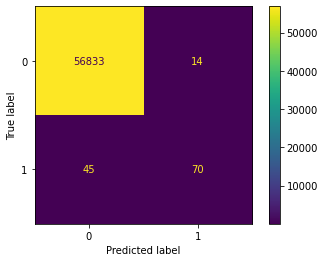

In [20]:
plot_confusion_matrix(lr_1,X_test, y_test)

Remark: Although the model seems to have high accuracy, the number of False Positive and False Negative is 70 and 45 respectively.

In this dataset, there will be 70 false alarm cases of credit card being fraud and 40 cases of fraud transaction being undetected.

As shown in the classification report, the precision and recall of this model for predicting for cases is 0.83 and 0.61 respectively. This is due to the extremely unbalance class of the dataset causing the model to be more biased towards non-fraud cases!



### Model used: Naive Bayes (1b)

In [107]:
nb_1 = train_model('1b',X_train, X_test, y_train, y_test,GaussianNB())

Score for training 0.9778314204832232
Score for testing 0.9777219900986622
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.07      0.83      0.13       115

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


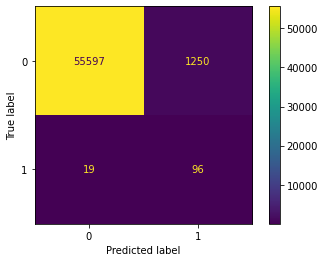

In [108]:
plot_confusion_matrix(nb_1,X_test, y_test)

### Model used: Support Vector Machine (1c)

In [23]:
%%time
svm_1 = train_model('1c',X_train, X_test, y_train, y_test,svm.SVC(C=10,random_state=123))

Score for training 0.9998200531062784
Score for testing 0.9994557775359011
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.97      0.76      0.85       115

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Wall time: 2min 59s


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


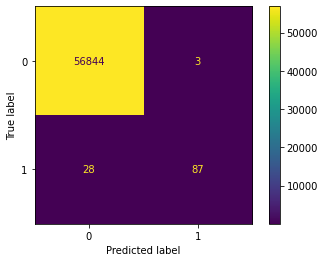

In [24]:
plot_confusion_matrix(svm_1,X_test, y_test)

### Model used: Decision Tree (1d)

In [25]:
dt_1 = train_model('1d',X_train, X_test, y_train, y_test,
                 DecisionTreeClassifier(random_state=123, criterion='gini', max_depth =5))     

Score for training 0.9996006056749106
Score for testing 0.9993504441557529
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.90      0.77      0.83       115

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


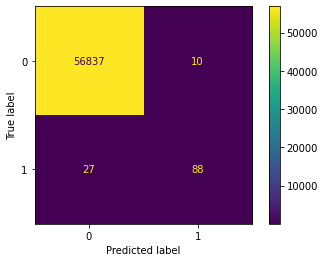

In [26]:
plot_confusion_matrix(dt_1,X_test, y_test)

### Remarks:
### The false positive for this model is low, but the false negative is still significant

### Trial 2: Upsampling of the minority data

In [29]:
from sklearn.utils import resample

In [30]:
X = main_df.loc[:,'Time':'Amount']
y = main_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =123)

training = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = training[training.Class==0]
fraud = training[training.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=123) # reproducible results

upsampled = pd.concat([not_fraud, fraud_upsampled])

print(upsampled.Class.value_counts())

X_train = upsampled.loc[:,'Time':'Amount']
y_train = upsampled['Class']


1    227468
0    227468
Name: Class, dtype: int64


In [31]:
X_train, X_test =scale_features(X_train,X_test)

### Model used: Logistic Regression (2a)

In [32]:
%%time
lr_2 = train_model('2a',X_train, X_test, y_train, y_test,LogisticRegression(solver = 'saga',max_iter=1000,n_jobs = -1,random_state= 123))


Score for training 0.9480168639105281
Score for testing 0.9759313226361434
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.07      0.93      0.14       115

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Wall time: 3min 8s


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


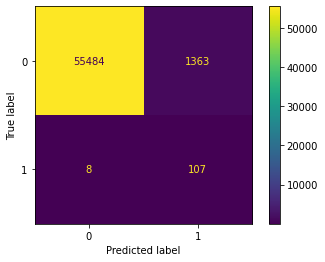

In [33]:
plot_confusion_matrix(lr_2,X_test, y_test)

### Model used: Naive Bayes (2b)


In [34]:
nb_2 = train_model('2b',X_train, X_test, y_train, y_test,GaussianNB())

Score for training 0.9157463907011096
Score for testing 0.9736315438362417
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.06      0.87      0.12       115

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.98     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


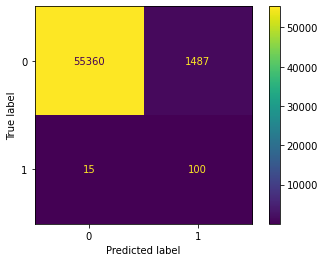

In [35]:
plot_confusion_matrix(nb_2,X_test, y_test)

### Model used: Support Vector Machine (2c) >> bad idea, the dataset is too large

In [ ]:
%%time
#svm_2 = train_model('2c',X_train, X_test, y_train, y_test,svm.SVC(C=10,random_state=123))

### Model used: Decision Tree (2d)

In [36]:
dt_2 = train_model('2d',X_train, X_test, y_train, y_test,
                 DecisionTreeClassifier(random_state=123, criterion='gini', max_depth =5)) 

Score for training 0.9684351205444283
Score for testing 0.9728766546118465
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56847
           1       0.06      0.89      0.12       115

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.98     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


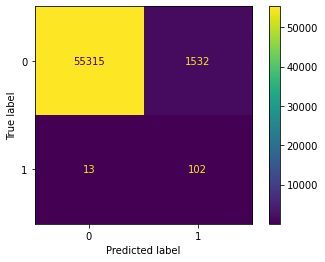

In [37]:
plot_confusion_matrix(dt_2,X_test, y_test)

### Remark: Upsampling the dataset is a completely bad idea, it causes the training dataset to be too big. Due to resampling of the fraud datasets, the amount of False Positive increased significantly because the 'new' datas introduced are unreliable.

### Trial 3: Downsampling of the majority data

In [53]:
X = main_df.loc[:,'Time':'Amount']
y = main_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =123)

training = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = training[training.Class==0]
fraud = training[training.Class==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 123) # reproducible results

downsampled = pd.concat([not_fraud_downsampled, fraud])

print(downsampled.Class.value_counts())

X_train = downsampled.loc[:,'Time':'Amount']
y_train = downsampled['Class']


1    377
0    377
Name: Class, dtype: int64


In [54]:
X_train, X_test =scale_features(X_train,X_test)

### Model used: Logistic Regression (3a)

In [40]:
lr_3 = train_model('3a',X_train, X_test, y_train, y_test,LogisticRegression())


Score for training 0.9549071618037135
Score for testing 0.965081984480882
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56847
           1       0.05      0.95      0.10       115

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


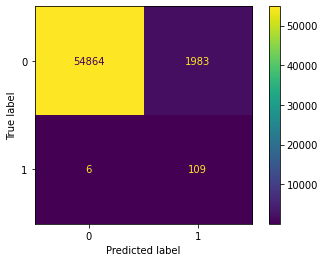

In [41]:
plot_confusion_matrix(lr_3,X_test, y_test)

### Model used: Naive Bayes (3b)


In [42]:
nb_3 = train_model('3b',X_train, X_test, y_train, y_test,GaussianNB())

Score for training 0.9098143236074271
Score for testing 0.9558126470278431
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56847
           1       0.04      0.87      0.07       115

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.96      0.98     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


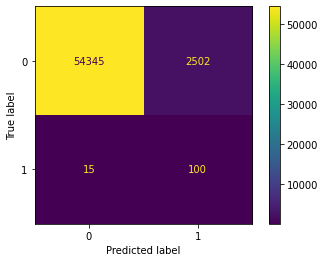

In [43]:
plot_confusion_matrix(nb_3,X_test, y_test)

### Model used: Support Vector Machine (3c)

In [44]:
svm_3 = train_model('3c',X_train, X_test, y_train, y_test,svm.SVC())

Score for training 0.9283819628647215
Score for testing 0.9863593272708121
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56847
           1       0.12      0.91      0.21       115

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


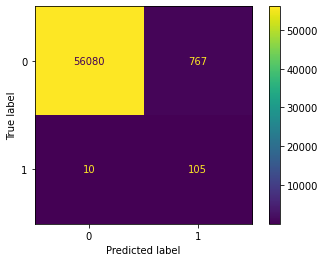

In [45]:
plot_confusion_matrix(svm_3,X_test, y_test)

### Model used: Decision Tree (3d)

In [55]:
dt_3 = train_model('3d',X_train, X_test, y_train, y_test,
                 DecisionTreeClassifier(random_state=123, criterion='gini', max_depth =5)) 

Score for training 0.9708222811671088
Score for testing 0.9175415189073417
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56847
           1       0.02      0.93      0.04       115

    accuracy                           0.92     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.92      0.96     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


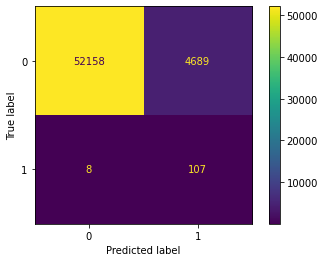

In [56]:
plot_confusion_matrix(dt_3,X_test, y_test)

### Trial 4: Synthetic Minority Oversampling Technique (SMOTE)

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
X = main_df.loc[:,'Time':'Amount']
y = main_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =123)

sm = SMOTE(random_state=123)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

1    227468
0    227468
Name: Class, dtype: int64

In [14]:
X_train, X_test =scale_features(X_train,X_test)

### Model used: Logistic Regression (4a)

In [15]:
%%time
lr_4 = train_model('4a',X_train, X_test, y_train, y_test,LogisticRegression(solver = 'saga',max_iter=1000,n_jobs = -1,random_state=123))


Score for training 0.9806764028346845
Score for testing 0.9911871071942698
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56847
           1       0.18      0.92      0.30       115

    accuracy                           0.99     56962
   macro avg       0.59      0.96      0.65     56962
weighted avg       1.00      0.99      0.99     56962

Wall time: 4min 22s


C:\Users\65915\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


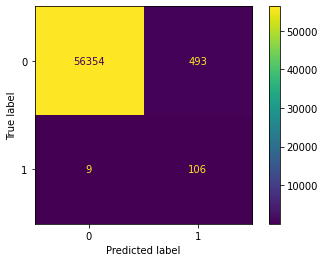

In [50]:
plot_confusion_matrix(lr_4,X_test, y_test)

### Model used: Naive Bayes (4b)


In [11]:
nb_4 = train_model('4b',X_train, X_test, y_train, y_test,GaussianNB())

Score for training 0.9238420349235936
Score for testing 0.9769671008742671
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.07      0.88      0.13       115

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


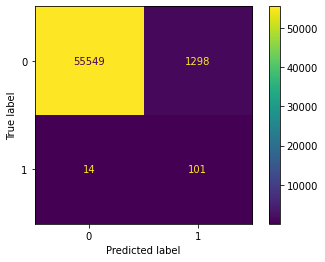

In [52]:
plot_confusion_matrix(nb_4,X_test, y_test)

### Model used: Decision Tree (4d)

In [60]:
dt_4 = train_model('4d',X_train, X_test, y_train, y_test,
                 DecisionTreeClassifier(random_state=123, criterion='gini', max_depth =5)) 

Score for training 0.9723961172560536
Score for testing 0.9882202169867631
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56847
           1       0.14      0.91      0.24       115

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962



C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


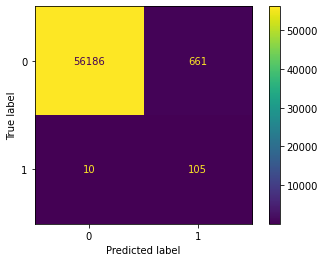

In [61]:
plot_confusion_matrix(dt_4,X_test, y_test)

# Discussion of Results

In [86]:
result=check_summary()
result

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall
1a,Original,Logistic_Regression,0.99925,0.99896,0.83333,0.60870
1b,Original,Naive_Bayes,0.97783,0.97772,0.07132,0.83478
1c,Original,Support_Vector_Machine,0.99982,0.99946,0.96667,0.75652
1d,Original,Decision_tree,0.99960,0.99935,0.89796,0.76522
2a,Upsampling,Logistic_Regression,0.94802,0.97593,0.07279,0.93043
2b,Upsampling,Naive_Bayes,0.91575,0.97363,0.06301,0.86957
2c,Upsampling,Support_Vector_Machine,0.00000,0.00000,0.00000,0.00000
2d,Upsampling,Decision_tree,0.96844,0.97288,0.06242,0.88696
3a,Downsampling,Logistic_Regression,0.95491,0.96508,0.05210,0.94783
3b,Downsampling,Naive_Bayes,0.90981,0.95581,0.03843,0.86957


In [151]:
#result.to_csv('result_discussion.csv')
result = pd.read_csv('result_discussion.csv',index_col='Unnamed: 0')
result

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall
1a,Original,Logistic_Regression,9.992539e-01,9.989642e-01,8.333333e-01,6.086957e-01
1b,Original,Naive_Bayes,9.778314e-01,9.777220e-01,7.132244e-02,8.347826e-01
1c,Original,Support_Vector_Machine,9.998201e-01,9.994558e-01,9.666667e-01,7.565217e-01
1d,Original,Decision_tree,9.996006e-01,9.993504e-01,8.979592e-01,7.652174e-01
2a,Upsampling,Logistic_Regression,9.480169e-01,9.759313e-01,7.278912e-02,9.304348e-01
2b,Upsampling,Naive_Bayes,9.157464e-01,9.736315e-01,6.301197e-02,8.695652e-01
2c,Upsampling,Support_Vector_Machine,1.035626e-311,6.230580e-307,9.791079e-307,1.056992e-307
2d,Upsampling,Decision_tree,9.684351e-01,9.728767e-01,6.242350e-02,8.869565e-01
3a,Downsampling,Logistic_Regression,9.549072e-01,9.650820e-01,5.210325e-02,9.478261e-01
3b,Downsampling,Naive_Bayes,9.098143e-01,9.558126e-01,3.843198e-02,8.695652e-01


In [152]:
result = result[result.Classification_model != 'Support_Vector_Machine']

In [153]:
precision = np.array(result.Precision)
recall = np.array(result.Recall)

In [154]:
result['F1_score'] = (2*precision*recall)/(precision+recall)

<ipython-input-154-23bc6483bd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['F1_score'] = (2*precision*recall)/(precision+recall)


In [155]:
result

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
1a,Original,Logistic_Regression,0.999254,0.998964,0.833333,0.608696,0.703518
1b,Original,Naive_Bayes,0.977831,0.977722,0.071322,0.834783,0.131417
1d,Original,Decision_tree,0.999601,0.999350,0.897959,0.765217,0.826291
2a,Upsampling,Logistic_Regression,0.948017,0.975931,0.072789,0.930435,0.135016
2b,Upsampling,Naive_Bayes,0.915746,0.973632,0.063012,0.869565,0.117509
2d,Upsampling,Decision_tree,0.968435,0.972877,0.062424,0.886957,0.116638
3a,Downsampling,Logistic_Regression,0.954907,0.965082,0.052103,0.947826,0.098777
3b,Downsampling,Naive_Bayes,0.909814,0.955813,0.038432,0.869565,0.073611
3d,Downsampling,Decision_tree,0.970822,0.917542,0.022310,0.930435,0.043576
4a,SMOTE,Logistic_Regression,0.980676,0.991187,0.176962,0.921739,0.296919


In [80]:
result[result.Classification_model=='Logistic_Regression']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
1a,Original,Logistic_Regression,0.99925,0.99896,0.83333,0.60870,0.70352
2a,Upsampling,Logistic_Regression,0.94802,0.97593,0.07279,0.93043,0.13502
3a,Downsampling,Logistic_Regression,0.95491,0.96508,0.05210,0.94783,0.09878
4a,SMOTE,Logistic_Regression,0.98068,0.99119,0.17696,0.92174,0.29692


In [21]:
result[result.Classification_model=='Naive_Bayes']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
1b,Original,Naive_Bayes,0.977831,0.977722,0.071322,0.834783,0.131417
2b,Upsampling,Naive_Bayes,0.915746,0.973632,0.063012,0.869565,0.117509
3b,Downsampling,Naive_Bayes,0.909814,0.955813,0.038432,0.869565,0.073611
4b,SMOTE,Naive_Bayes,0.923842,0.976967,0.072194,0.878261,0.133421


In [83]:
result[result.Classification_model=='Decision_tree']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
1d,Original,Decision_tree,0.99960,0.99935,0.89796,0.76522,0.82629
2d,Upsampling,Decision_tree,0.96844,0.97288,0.06242,0.88696,0.11664
3d,Downsampling,Decision_tree,0.97082,0.91754,0.02231,0.93043,0.04358
4d,SMOTE,Decision_tree,0.97240,0.98822,0.13708,0.91304,0.23837


In [84]:
result[result.Sampling_method=='SMOTE']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
4a,SMOTE,Logistic_Regression,0.98068,0.99119,0.17696,0.92174,0.29692
4b,SMOTE,Naive_Bayes,0.92384,0.97697,0.07219,0.87826,0.13342
4d,SMOTE,Decision_tree,0.97240,0.98822,0.13708,0.91304,0.23837


### SMOTE gave the best result, high in both precision and recall. Its precision is relatively high comepared to other sampling method.

# Hyper-parameter tuning 

In [7]:
from sklearn.model_selection import GridSearchCV

In [59]:
X = main_df.loc[:,'Time':'Amount']
y = main_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state =123)

sm = SMOTE(random_state=123)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

1    227468
0    227468
Name: Class, dtype: int64

In [60]:
X_train, X_test =scale_features(X_train,X_test)

In [47]:
log = LogisticRegression(solver = 'saga',max_iter=1000,n_jobs = -1)
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1,10,30]}
clf_lr = GridSearchCV(log,lr_params,n_jobs = -1, scoring = 'f1', verbose=3)

In [48]:
%%time
clf_lr.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 27min 1s


C:\Users\65915\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [1, 10, 30], 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=3)

In [49]:
clf_lr.best_params_


{'C': 30, 'penalty': 'l1'}

In [126]:
result

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
1a,Original,Logistic_Regression,9.992539e-01,9.989642e-01,8.333333e-01,6.086957e-01,0.703518
1b,Original,Naive_Bayes,9.778314e-01,9.777220e-01,7.132244e-02,8.347826e-01,0.131417
1c,Original,Support_Vector_Machine,9.998201e-01,9.994558e-01,9.666667e-01,7.565217e-01,0.848780
1d,Original,Decision_tree,9.996006e-01,9.993504e-01,8.979592e-01,7.652174e-01,0.826291
2a,Upsampling,Logistic_Regression,9.480169e-01,9.759313e-01,7.278912e-02,9.304348e-01,0.135016
2b,Upsampling,Naive_Bayes,9.157464e-01,9.736315e-01,6.301197e-02,8.695652e-01,0.117509
2c,Upsampling,Support_Vector_Machine,1.035626e-311,6.230580e-307,9.791079e-307,1.056992e-307,0.000000
2d,Upsampling,Decision_tree,9.684351e-01,9.728767e-01,6.242350e-02,8.869565e-01,0.116638
3a,Downsampling,Logistic_Regression,9.549072e-01,9.650820e-01,5.210325e-02,9.478261e-01,0.098777
3b,Downsampling,Naive_Bayes,9.098143e-01,9.558126e-01,3.843198e-02,8.695652e-01,0.073611


In [50]:
clf_lr.score(X_train,y_train)

0.9804851067043711

In [51]:
print(classification_report(y_test, clf_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56847
           1       0.18      0.92      0.30       115

    accuracy                           0.99     56962
   macro avg       0.59      0.96      0.65     56962
weighted avg       1.00      0.99      0.99     56962



In [52]:
from sklearn import metrics

In [146]:
train_score=metrics.accuracy_score(y_train,clf_lr.predict(X_train))
test_score=metrics.accuracy_score(y_test,clf_lr.predict(X_test))
prec_=metrics.precision_score(y_test,clf_lr.predict(X_test))
recall_=metrics.recall_score(y_test,clf_lr.predict(X_test))
f1_=metrics.f1_score(y_test,clf_lr.predict(X_test))

In [156]:
result.loc['5a'] = ['SMOTE_gs','Logistic_Regression',train_score,test_score,prec_,recall_,f1_]

C:\Users\65915\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [158]:
result[result.Classification_model=='Logistic_Regression'].loc['4a':'5a']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
4a,SMOTE,Logistic_Regression,0.980676,0.991187,0.176962,0.921739,0.296919
5a,SMOTE_gs,Logistic_Regression,0.989330,0.989484,0.153295,0.930435,0.263223


# NB

In [122]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 n_jobs = -1,  
                 verbose=1, 
                 scoring='f1') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.0}

In [159]:
train_score=metrics.accuracy_score(y_train,gs_NB.predict(X_train))
test_score=metrics.accuracy_score(y_test,gs_NB.predict(X_test))
prec_=metrics.precision_score(y_test,gs_NB.predict(X_test))
recall_=metrics.recall_score(y_test,gs_NB.predict(X_test))
f1_=metrics.f1_score(y_test,gs_NB.predict(X_test))

In [160]:
result.loc['5b'] = ['SMOTE_gs','Naive_Bayes',train_score,test_score,prec_,recall_,f1_]

C:\Users\65915\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [162]:
result[result.Classification_model=='Naive_Bayes'].loc['4b':'5b']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
4b,SMOTE,Naive_Bayes,0.923842,0.976967,0.072194,0.878261,0.133421
5b,SMOTE_gs,Naive_Bayes,0.995330,0.995506,0.243636,0.582609,0.343590


In [58]:
# Decision Tree

In [62]:
params_dt = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=123), params_dt, verbose=1, cv=3,scoring='f1',n_jobs=-1)

gs_dt.fit(X_train,y_train)


Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1', verbose=1)

In [64]:
gs_dt.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [163]:
train_score=metrics.accuracy_score(y_train,gs_dt.predict(X_train))
test_score=metrics.accuracy_score(y_test,gs_dt.predict(X_test))
prec_=metrics.precision_score(y_test,gs_dt.predict(X_test))
recall_=metrics.recall_score(y_test,gs_dt.predict(X_test))
f1_=metrics.f1_score(y_test,gs_dt.predict(X_test))

In [164]:
result.loc['5d'] = ['SMOTE_gs','Decision_tree',train_score,test_score,prec_,recall_,f1_]

C:\Users\65915\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
result[result.Classification_model=='Decision_tree'].loc['4d':'5d']

,Sampling_method,Classification_model,Training_score,Testing_score,Precision,Recall,F1_score
4d,SMOTE,Decision_tree,0.972396,0.988220,0.137076,0.913043,0.238365
5d,SMOTE_gs,Decision_tree,0.991885,0.990643,0.167197,0.913043,0.282638


In [168]:
from sklearn.metrics import roc_curve, auc

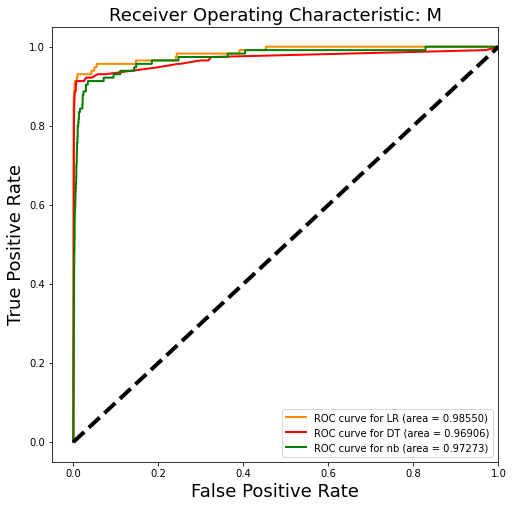

In [170]:
# for logR
preds_lr = clf_lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _lr = roc_curve(y_test, preds_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)


#for nb

preds_nb = gs_NB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _nb = roc_curve(y_test, preds_nb)

roc_auc_nb = auc(fpr_nb, tpr_nb)

#for dt

preds_dt = gs_dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, preds_dt)

roc_auc_dt = auc(fpr_dt, tpr_dt)



plt.figure(figsize=[8,8])

plt.plot(fpr_lr, tpr_lr, color='darkorange', lw = 2, label = 'ROC curve for LR (area = %0.5f)' % roc_auc_lr)

plt.plot(fpr_dt, tpr_dt, color='red', lw = 2, label = 'ROC curve for DT (area = %0.5f)' % roc_auc_dt)

plt.plot(fpr_nb, tpr_nb, color='green', lw = 2, label = 'ROC curve for nb (area = %0.5f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Logisitic Regression is the best method for detecting fraud in credit card

In [172]:
#result.to_csv('result_tunedPara.csv')